In [1]:
import pandas as pd

import testPPO,testA2C,testStatic
from glob import glob
import os
import numpy as np


In [2]:
configs= [f.name for f in os.scandir('configs') if f.is_dir()]
configs.sort()
configs

['hangzhou_1x1_bc-tyc_18041607_1h',
 'hangzhou_1x1_bc-tyc_18041608_1h',
 'hangzhou_1x1_bc-tyc_18041610_1h',
 'hangzhou_1x1_kn-hz_18041607_1h',
 'hangzhou_1x1_kn-hz_18041608_1h',
 'hangzhou_1x1_qc-yn_18041607_1h',
 'hangzhou_1x1_qc-yn_18041608_1h',
 'hangzhou_1x1_sb-sx_18041607_1h',
 'hangzhou_1x1_sb-sx_18041608_1h',
 'hangzhou_1x1_tms-xy_18041607_1h',
 'hangzhou_1x1_tms-xy_18041608_1h']

In [3]:
results = []
for config in configs:
    print('Using config: ',config)
    print('A2C:')
    a2c = testA2C.test(config)
    print(a2c)
    print('PPO:')
    ppo = testPPO.test(config)
    print(ppo)
    results.append([config,a2c,ppo])
    print("__________________________________________________________________")

Using config:  hangzhou_1x1_bc-tyc_18041607_1h
A2C:
Episode reward:  [-3049.]
[{'avg_travel_time': 108.78679653679653, 'terminal_observation': array([0., 0., 2., 0., 0., 2., 2., 9.])}]
108.78679653679653
PPO:
Episode reward:  [-2753.]
[{'avg_travel_time': 105.65963203463204, 'terminal_observation': array([8., 0., 2., 0., 4., 2., 0., 0.])}]
105.65963203463204
__________________________________________________________________
Using config:  hangzhou_1x1_bc-tyc_18041608_1h
A2C:
Episode reward:  [-3903.]
[{'avg_travel_time': 113.33975795607351, 'terminal_observation': array([ 5.,  0.,  0.,  1.,  3.,  1., 14., 19.])}]
113.33975795607351
PPO:
Episode reward:  [-3940.]
[{'avg_travel_time': 117.88614970865083, 'terminal_observation': array([ 7.,  0.,  0.,  1.,  4.,  0.,  8., 10.])}]
117.88614970865083
__________________________________________________________________
Using config:  hangzhou_1x1_bc-tyc_18041610_1h
A2C:
Episode reward:  [-3031.]
[{'avg_travel_time': 101.63483424047502, 'terminal

In [21]:
results

[['hangzhou_1x1_bc-tyc_18041607_1h', 108.78679653679653, 105.65963203463204],
 ['hangzhou_1x1_bc-tyc_18041608_1h', 113.33975795607351, 117.88614970865083],
 ['hangzhou_1x1_bc-tyc_18041610_1h', 101.63483424047502, 106.10737258782781],
 ['hangzhou_1x1_kn-hz_18041607_1h', 98.44740024183797, 92.79156626506024],
 ['hangzhou_1x1_kn-hz_18041608_1h', 100.6271870794078, 91.84118438761777],
 ['hangzhou_1x1_qc-yn_18041607_1h', 107.70287044220326, 91.70830100853375],
 ['hangzhou_1x1_qc-yn_18041608_1h', 97.97672778561353, 92.33709449929478],
 ['hangzhou_1x1_sb-sx_18041607_1h', 101.43087971274686, 96.94733692399761],
 ['hangzhou_1x1_sb-sx_18041608_1h', 109.6619094488189, 107.78543307086615],
 ['hangzhou_1x1_tms-xy_18041607_1h', 119.90959878110716, 110.5352971051295],
 ['hangzhou_1x1_tms-xy_18041608_1h', 143.07179249652617, 123.38721630384437]]

In [4]:
static = []
for config in configs:
    print('Using config: ',config)
    s = testStatic.test(config)
    print(s)
    static.append([config,s])
    print("__________________________________________________________________")

Using config:  hangzhou_1x1_bc-tyc_18041607_1h
Episode reward:  -10271.0
{'avg_travel_time': 524.1317794710892}
524.1317794710892
__________________________________________________________________
Using config:  hangzhou_1x1_bc-tyc_18041608_1h
Episode reward:  -10276.0
{'avg_travel_time': 524.8050201703272}
524.8050201703272
__________________________________________________________________
Using config:  hangzhou_1x1_bc-tyc_18041610_1h
Episode reward:  -10271.0
{'avg_travel_time': 524.1326759300762}
524.1326759300762
__________________________________________________________________
Using config:  hangzhou_1x1_kn-hz_18041607_1h
Episode reward:  -10276.0
{'avg_travel_time': 524.8054683998207}
524.8054683998207
__________________________________________________________________
Using config:  hangzhou_1x1_kn-hz_18041608_1h
Episode reward:  -10276.0
{'avg_travel_time': 524.8045719408337}
524.8045719408337
__________________________________________________________________
Using config:  ha

In [ ]:
static

In [26]:
df = pd.DataFrame(results,columns=["name","A2C","PPO"])
df.to_csv("data.csv",index=False)

In [5]:
df = pd.read_csv('data.csv',index_col='name').round(0)
df = df.astype(int)
df

,SOTL,A2C,PPO,DQN
name,,,,
hangzhou_1x1_bc-tyc_18041607_1h,221,109,106,151
hangzhou_1x1_bc-tyc_18041608_1h,335,113,118,153
hangzhou_1x1_bc-tyc_18041610_1h,213,102,106,143
hangzhou_1x1_kn-hz_18041607_1h,72,98,93,112
hangzhou_1x1_kn-hz_18041608_1h,64,101,92,105
hangzhou_1x1_qc-yn_18041607_1h,117,108,92,141
hangzhou_1x1_qc-yn_18041608_1h,132,98,92,129
hangzhou_1x1_sb-sx_18041607_1h,174,101,97,132
hangzhou_1x1_sb-sx_18041608_1h,290,110,108,172


In [7]:
df.to_csv('data.csv')

<Axes: xlabel='Average travel time in seconds', ylabel='name'>

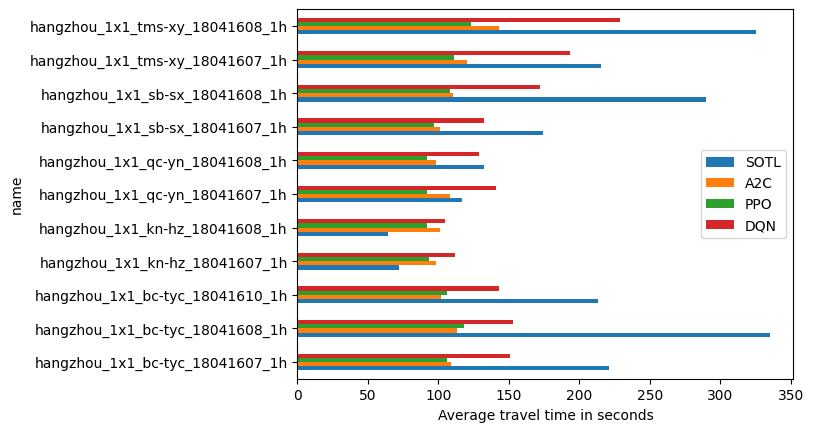

In [6]:
df.plot.barh(xlabel= "Average travel time in seconds")

In [9]:
import json
configs= [f.name for f in os.scandir('configs') if f.is_dir()]
configs.sort()
configs

['hangzhou_1x1_bc-tyc_18041607_1h',
 'hangzhou_1x1_bc-tyc_18041608_1h',
 'hangzhou_1x1_bc-tyc_18041610_1h',
 'hangzhou_1x1_kn-hz_18041607_1h',
 'hangzhou_1x1_kn-hz_18041608_1h',
 'hangzhou_1x1_qc-yn_18041607_1h',
 'hangzhou_1x1_qc-yn_18041608_1h',
 'hangzhou_1x1_sb-sx_18041607_1h',
 'hangzhou_1x1_sb-sx_18041608_1h',
 'hangzhou_1x1_tms-xy_18041607_1h',
 'hangzhou_1x1_tms-xy_18041608_1h']

'hangzhou_1x1_bc-tyc_18041607_1h'

In [11]:
info = []
for config in configs:
    with open(f'configs/{config}/flow.json', 'r') as file:
        data = file.read().replace('\n', '')
        n = json.loads(data)
        info.append((config,len(n)))



In [12]:
info

[('hangzhou_1x1_bc-tyc_18041607_1h', 1848),
 ('hangzhou_1x1_bc-tyc_18041608_1h', 2231),
 ('hangzhou_1x1_bc-tyc_18041610_1h', 2021),
 ('hangzhou_1x1_kn-hz_18041607_1h', 827),
 ('hangzhou_1x1_kn-hz_18041608_1h', 743),
 ('hangzhou_1x1_qc-yn_18041607_1h', 1289),
 ('hangzhou_1x1_qc-yn_18041608_1h', 1417),
 ('hangzhou_1x1_sb-sx_18041607_1h', 1671),
 ('hangzhou_1x1_sb-sx_18041608_1h', 2032),
 ('hangzhou_1x1_tms-xy_18041607_1h', 1969),
 ('hangzhou_1x1_tms-xy_18041608_1h', 2159)]

In [20]:


n = json.loads(data)


In [21]:
len(n)

743